In [1]:
import matplotlib.pyplot as plt
import xarray as xr

from climate_index_collection.data_loading import VARNAME_MAPPING, load_data_set
from climate_index_collection.reductions import (
    spatial_mask,
    area_mean_weighted)


In [2]:
FOCI_alldata = load_data_set(data_path="../data/test_data/", data_source_name="FOCI")
CESM_alldata = load_data_set(data_path="../data/test_data/", data_source_name="CESM")

/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


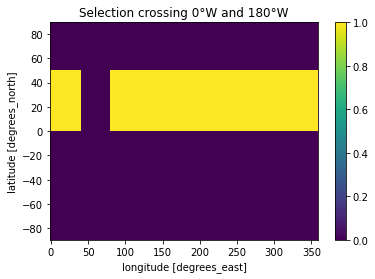

In [3]:
spatial_mask(FOCI_alldata["sea-surface-temperature"],
             lat_south = 0,
             lat_north = 50,
             lon_west = 80,
             lon_east = 40,
             lat_name = "lat",
             lon_name = "lon"
            ).plot()
plt.title("Selection crossing 0°W and 180°W")
plt.savefig("spatial_mask.png", facecolor="w")

## Testing

In [28]:
import weakref

import numpy as np
import pytest
import xarray as xr
from xarray import DataArray
# ========
# CREATE TEST DATA PARAMETERS AND FUNCTIONS
# ========
#@pytest.fixture
def example_data():
    lon = np.array([0, 10, 60, 120, 180, 240, 300, 360])
    lat = np.array([-90, -45, 0, 10, 45, 90])
    data = DataArray(
        np.ones(shape=(len(lat), len(lon))),
        dims=("lat", "lon"),
        coords={"lat": lat, "lon": lon},
        )
    data[4,4] = np.nan
    return data

def expample_mask_01(): 
    """
    This mask is true for the ranges
    lat_north = 90
    lat_south = 0
    lon_west = 200
    lon_east = 350
    """
    lon = np.array([0, 10, 60, 120, 180, 240, 300, 360])
    lat = np.array([-90, -45, 0, 10, 45, 90])
    data = DataArray(
        np.array([
           [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
           [ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.],
           [ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.],
           [ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.],
           [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]
        ]),
        dims=("lat", "lon"),
        coords={"lat": lat, "lon": lon},
    )
    return data
    
def 

In [37]:
@pytest.mark.parametrize(
    "example_data", 
    [
        example_data
    ],)
@pytest.mark.parametrize(
    "example_mask", "lat_north", "lat_south", "lon_west", "lon_east"
    [
        [expample_mask_01,  90,  0, 200, 350]
        
    ],
def test_spatial_mask(example_data, example_mask, lat_north, lat_south, lon_west, lon_east):
    mask = spatial_mask(
        example_data,
        lat_north = lat_north,
        lat_south = lat_south,
        lon_west = lon_west,
        lon_east = lon_east
    )
    np.testing.assert_allclose(mask.data, example_data)


SyntaxError: invalid syntax (2785172055.py, line 12)

In [36]:
np.testing.assert_allclose(expample_mask_01().data, 
    spatial_mask(
        example_data(),
        lat_north = 60,
        lat_south = 0,
        lon_west = 360,
        lon_east = 200
    ).data
    )

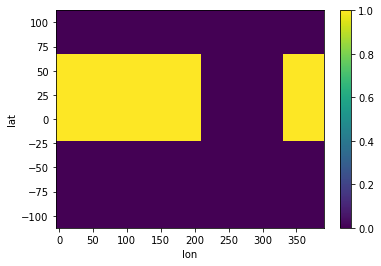

In [31]:
spatial_mask(
    example_data(),
    lat_north = 60,
    lat_south = 0,
    lon_west = 350,
    lon_east = 200
)

In [26]:
example_data() * example_data().lat

<xarray.DataArray (lat: 6, lon: 8)>
array([[-90., -90., -90., -90., -90., -90., -90., -90.],
       [-45., -45., -45., -45., -45., -45., -45., -45.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.],
       [ 45.,  45.,  45.,  45.,  nan,  45.,  45.,  45.],
       [ 90.,  90.,  90.,  90.,  90.,  90.,  90.,  90.]])
Coordinates:
  * lat      (lat) int64 -90 -45 0 10 45 90
  * lon      (lon) int64 0 10 60 120 180 240 300 360

In [27]:
example_data() * example_data().lon

<xarray.DataArray (lat: 6, lon: 8)>
array([[  0.,  10.,  60., 120., 180., 240., 300., 360.],
       [  0.,  10.,  60., 120., 180., 240., 300., 360.],
       [  0.,  10.,  60., 120., 180., 240., 300., 360.],
       [  0.,  10.,  60., 120., 180., 240., 300., 360.],
       [  0.,  10.,  60., 120.,  nan, 240., 300., 360.],
       [  0.,  10.,  60., 120., 180., 240., 300., 360.]])
Coordinates:
  * lat      (lat) int64 -90 -45 0 10 45 90
  * lon      (lon) int64 0 10 60 120 180 240 300 360